In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = pd.read_csv("C:\\personal\\data science\\coding ninjas\\Linear_X_Train.csv")
y = pd.read_csv("C:\\personal\\data science\\coding ninjas\\Linear_Y_Train.csv")

### Converting data to numpy array to perform calculations

In [37]:
X = X.values
y = y.values



### Visualising the data using scatter plot

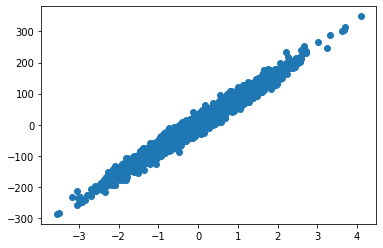

In [38]:
plt.scatter(X,y)

#### Creating a hypothesis function which is line equation 

In [65]:
def hypothesis(X,theta):
    return X*theta[1] + theta[0]

#### Defining the error function once values are predicted

In [66]:
def error(X,theta,y):
    m = X.shape[0]
    total_err = 0.0
    for i in range(m):
        hx = hypothesis(X[i],theta)
        total_err+= (y[i] - hx)**2
    return total_err/m

#### Gradient Function to define gradient descent

In [67]:
def gradient(X,theta,y):
    m = X.shape[0]
    grad = np.zeros((2,1))
    for i in range(m):
        hx = hypothesis(X[i],y)
        grad[0] += hx - y[i]
        grad[1] += (hx - y[i])*X[i]
    return grad/m

#### Gradient descent definition for model optimization

In [109]:
def grad_des(X,y,lr,max_ittr):
    theta = np.random.randint(-1,1, size= (2,1))
    grad = gradient(X,theta,y)
    error_list = []
    for i in range(max_ittr):
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
        err = error(X,theta,y)
        error_list.append(err)
    return (theta, error_list)
    

#### Running the gradient function will return theta values of line equation (parameters of algorithm) and error list to see how error changes with theta values

In [118]:
theta, error_list = grad_des(X,y,lr=0.01,max_ittr = 70)


#### Predictions are obtained by running hypothesis function

In [119]:
print(theta)
predictions = hypothesis(X,theta)

[[ 0]
 [71]]


#### Plotting comparison of prediction vs data points 

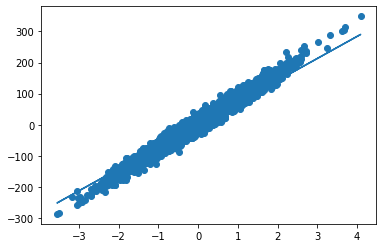

In [120]:
plt.scatter(X,y)
plt.plot(X,predictions)
plt.show()

#### Plotting error optimization with change in theta values

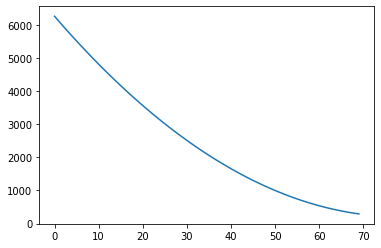

In [121]:
plt.plot(error_list)

In [123]:
df = pd.DataFrame(data = predictions,columns = {'y': 'predictions'},index = None )


In [126]:
saved = df.to_csv("C:\\personal\\data science\\coding ninjas\\my_submission1.csv")

#### Saving predictions to csv file to make a submission

In [127]:
X_test = pd.read_csv("C:\\personal\\data science\\coding ninjas\\Test_Cases\\Linear_X_Test.csv")

In [128]:
Y_test = hypothesis(X_test,theta)

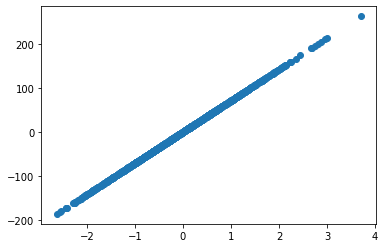

In [140]:
plt.scatter(X_test,Y_test)

In [141]:
print(Y_test)

               x
0    -133.334053
1     -61.701266
2    -179.642952
3     195.974587
4      41.961009
...          ...
1245  -11.932153
1246   66.187801
1247    9.088555
1248  -19.740669
1249  -48.310205

[1250 rows x 1 columns]


In [157]:
df2 = pd.DataFrame(data = Y_test)


In [159]:
print(df2)

               x
0    -133.334053
1     -61.701266
2    -179.642952
3     195.974587
4      41.961009
...          ...
1245  -11.932153
1246   66.187801
1247    9.088555
1248  -19.740669
1249  -48.310205

[1250 rows x 1 columns]


In [135]:
print(df)

               y
0     -20.540827
1     -41.805484
2      72.953032
3     -18.389925
4      55.525066
...          ...
3745   -7.170437
3746   95.792999
3747  -21.666620
3748  118.984137
3749  -34.914764

[3750 rows x 1 columns]


In [160]:
saved = df2.to_csv("C:\\personal\\data science\\coding ninjas\\my_submission2.csv")